In [2]:
# Import packages required
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [19]:
def func_model_training(model,x,y):
    num_epochs=2000
    epoch_iter=1
    lossm_val=0
    minimal_ratio=0
    while(True):
        predicted_y = model(x)
        loss=loss_function(predicted_y,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        grad_all=0.0
        for p in model.parameters():
            grad=0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        total_params=sum(p.numel() for p in model.parameters())
        if(grad_norm<0.001):
            print('grad_norm got converged')
            predicted_y = model(x)
            lossm=loss_function(predicted_y,y)
            H = torch.zeros((total_params, total_params))
            # Calculate Jacobian w.r.t. model parameters
            J = torch.autograd.grad(lossm, list(model.parameters()), create_graph=True)
            J = torch.cat([e.flatten() for e in J]) # flatten
            for i in range(total_params):
                result = torch.autograd.grad(J[i], list(model.parameters()), retain_graph=True)
                H[i] = torch.cat([r.flatten() for r in result]) # flatten
            H_eig=torch.symeig(H).eigenvalues
            positive_count=0
            for i in H_eig.tolist():
                if(i>0):
                    positive_count+=1
            minimal_ratio = positive_count/H.shape[0]
            print('minimal_ratio',minimal_ratio)
            print('loss',lossm.data.detach().numpy())
            lossm_val=lossm.data.detach().numpy()
            break
        if(epoch_iter>=num_epochs):
            print('grad_norm is not converged but epochs reached max')
            break
        epoch_iter +=1    
    return lossm_val,minimal_ratio
        

In [20]:
x=np.expand_dims(np.arange(-1.5, 1.5, 0.01),1) 
y=np.sin(5*(np.pi)*x)/(5*(np.pi)*x)

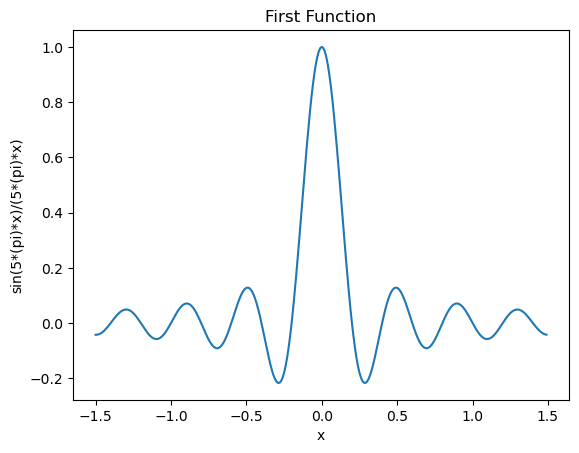

In [21]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.plot(x,y)
plt.title("First Function")
plt.xlabel("x")
plt.ylabel("sin(5*(pi)*x)/(5*(pi)*x)")
plt.show()

In [22]:
class NN1(nn.Module):
    def __init__(self,):
        super(NN1,self).__init__()
        self.l1 = nn.Linear(1,5)
        self.l2 = nn.Linear(5,8)
        self.l3 = nn.Linear(8,10)
        self.l4 = nn.Linear(10,10)
        self.l5 = nn.Linear(10,10)
        self.l6 = nn.Linear(10,10)
        self.l7 = nn.Linear(10,8)
        self.l8 = nn.Linear(8,5)
        self.output = nn.Linear(5,1)
    
    def forward(self,x):
        x=F.leaky_relu(self.l1(x))
        x=F.leaky_relu(self.l2(x))
        x=F.leaky_relu(self.l3(x))
        x=F.leaky_relu(self.l4(x))
        x=F.leaky_relu(self.l5(x))
        x=F.leaky_relu(self.l6(x))
        x=F.leaky_relu(self.l7(x))
        x=F.leaky_relu(self.l8(x))
        x=self.output(x)
        
        return x
        

In [23]:
loss_list=[]
minimal_ratio_list=[]
for i in range(50):
    nn1=NN1()
    num_epochs=2000
    optimizer = torch.optim.Adam(nn1.parameters(), lr = 1e-3, weight_decay = 1e-4)
    loss_function = nn.MSELoss()
    loss, minimal_ratio= func_model_training(nn1, x, y)
    loss_list.append(loss)
    minimal_ratio_list.append(minimal_ratio)


grad_norm is not converged but epochs reached max
grad_norm got converged
minimal_ratio 0.5235008103727715
loss 0.0053724092
grad_norm got converged
minimal_ratio 0.5008103727714749
loss 0.061309237
grad_norm got converged
minimal_ratio 0.5348460291734197
loss 0.0033858777
grad_norm got converged
minimal_ratio 0.5056726094003241
loss 0.061308485
grad_norm got converged
minimal_ratio 0.5494327390599676
loss 0.001232111
grad_norm got converged
minimal_ratio 0.5024311183144247
loss 0.061310127
grad_norm got converged
minimal_ratio 0.5251215559157212
loss 0.0022327574
grad_norm got converged
minimal_ratio 0.5008103727714749
loss 0.06130989
grad_norm got converged
minimal_ratio 0.5008103727714749
loss 0.06122205
grad_norm got converged
minimal_ratio 0.5040518638573744
loss 0.06127737
grad_norm got converged
minimal_ratio 0.4991896272285251
loss 0.06131082
grad_norm got converged
minimal_ratio 0.5008103727714749
loss 0.061314132
grad_norm got converged
minimal_ratio 0.526742301458671
loss 0.

In [24]:
print(loss_list)
print(minimal_ratio_list)

[0, array(0.00537241, dtype=float32), array(0.06130924, dtype=float32), array(0.00338588, dtype=float32), array(0.06130848, dtype=float32), array(0.00123211, dtype=float32), array(0.06131013, dtype=float32), array(0.00223276, dtype=float32), array(0.06130989, dtype=float32), array(0.06122205, dtype=float32), array(0.06127737, dtype=float32), array(0.06131082, dtype=float32), array(0.06131413, dtype=float32), array(0.0022344, dtype=float32), array(0.00223307, dtype=float32), array(0.00167433, dtype=float32), array(0.00217119, dtype=float32), array(0.06131222, dtype=float32), array(0.06139246, dtype=float32), array(0.06131089, dtype=float32), array(0.06131127, dtype=float32), array(0.06127262, dtype=float32), 0, array(0.06128326, dtype=float32), array(0.06128501, dtype=float32), array(0.0612754, dtype=float32), array(0.00543974, dtype=float32), array(0.06131003, dtype=float32), array(0.06133275, dtype=float32), array(0.00214939, dtype=float32), array(0.06124926, dtype=float32), 0, array(

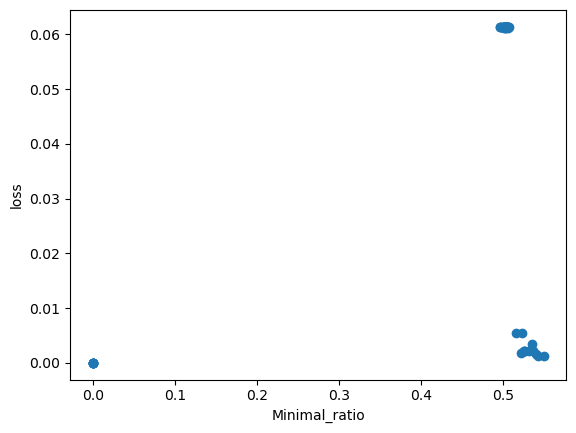

In [25]:
plt.scatter(minimal_ratio_list,loss_list)
plt.xlabel("Minimal_ratio")
plt.ylabel("loss")
plt.show()